# Arbeitspaket (AP) 3: Machine Learning (ML)

### Persönliche Angaben (bitte ergänzen)

<table>
  <tr>
    <td>Vorname:</td>
    <td></td>
  </tr>
  <tr>
    <td>Nachname:</td>
    <td></td>
  </tr>
  <tr>
    <td>Immatrikulationsnummer:</td>
    <td></td>
  </tr>
  <tr>
    <td>Modul:</td>
    <td>Data Science</td>
  </tr>
  <tr>
    <td>Prüfungsdatum / Raum / Zeit:</td>
    <td>10.11.2025 / Raum: MU O2.001 / 8:00 – 11:45</td>
  </tr>
  <tr>
    <td>Erlaubte Hilfsmittel:</td>
    <td>w.MA.XX.DS.24HS (Data Science)<br>Open Book, Eigener Computer, Internet-Zugang</td>
  </tr>
  <tr>
  <td>Nicht erlaubt:</td>
  <td>Nicht erlaubt ist der Einsatz beliebiger Formen von generativer KI (z.B. Copilot, ChatGPT) <br> sowie beliebige Formen von Kommunikation oder Kollaboration mit anderen Menschen.</td>
</tr>
</table>

## Bewertungskriterien

### <b style="color: gray;">(max. erreichbare Punkte: 40)</b>

<table>
  <thead>
    <tr>
      <th>Kategorie</th>
      <th>Beschreibung</th>
      <th>Punkteverteilung</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Code nicht lauffähig oder Ergebnisse nicht sinnvoll</td>
      <td>Der Code enthält Fehler, die verhindern, dass er ausgeführt werden kann (z.B. Syntaxfehler) oder es werden Ergebnisse ausgegeben, welche nicht zur Fragestellung passen.</td>
      <td>0 Punkte</td>
    </tr>
    <tr>
      <td>Code lauffähig, aber mit gravierenden Mängeln</td>
      <td>Der Code läuft, aber die Ergebnisse sind aufgrund wesentlicher Fehler unvollständig (z.B. die Erstellung der Train- und Test Daten ist fehlerhaft, die gewählte Modellierungsmethode entspricht nicht den Anforderungen gemäss Fragestellung). Nur geringer Fortschritt erkennbar.</td>
      <td>25% der max. erreichbaren Punkte</td>
    </tr>
    <tr>
      <td>Code lauffähig, aber mit mittleren Mängeln</td>
      <td>Der Code läuft und liefert teilweise korrekte Ergebnisse, aber es gibt grössere Fehler (z.B. Auswahl der Features entspricht nicht den Anforderungen gemäss Fragestellung). Die Ergebnisse sind nachvollziehbar, aber unvollständig oder ungenau.</td>
      <td>50% der max. erreichbaren Punkte</td>
    </tr>
    <tr>
      <td>Code lauffähig, aber mit minimalen Mängeln</td>
      <td>Der Code läuft und liefert ein weitgehend korrektes Ergebnis, aber kleinere Fehler (z.B. Formatierung der Modellergebnisse entspricht nicht den Anforderungen gemäss Fragestellung) beeinträchtigen die Vollständigkeit des Ergebnisses.</td>
      <td>75% der max. erreichbaren Punkte</td>
    </tr>
    <tr>
      <td>Code lauffähig und korrekt</td>
      <td>Der Code läuft einwandfrei und liefert das korrekte Ergebnis ohne Mängel.</td>
      <td>100% der max. erreichbaren Punkte</td>
    </tr>
  </tbody>
</table>



## Python Libraries und Settings

In [1]:
# Libraries
import os
import pickle
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import tree
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/LN2_AP03


## <b>Vorbereitung (Dieser Teil wird <u>nicht</u> bewertet!)</b>

#### <b>1.) Starten Sie eine GitHub Codespaces Instanz auf Basis Ihres Forks des folgenden GitHub Repositories:</b>

##### GitHub-Repository: https://github.com/mario-gellrich-zhaw/python_machine_learning_basics

### Einlesen des vorbereiteten Bicycle Datensatzes

In [2]:
# Verbindung zur SQLite-Datenbank herstellen
conn = sqlite3.connect('./Data/bicycle_data_prepared.db')

# Cursor erstellen (der Cursor führt SQL-Abfragen aus)
cursor = conn.cursor()

# SQL-Abfrage erstellen und ausführen
df = pd.read_sql_query("""SELECT * FROM bicycle_data_prepared""", con=conn)

# Verbindung schliessen
conn.close()

# Anzeigen der Dimensionen des DataFrames (Zeilen und Spalten)
print(df.shape)

# Anzeigen des DataFrames (erste 5 Zeilen)
df.head()

(5000, 18)


,offer_id,dealer_plz,dealer_city,dealer_street_house_nr,make,model,price_raw,gear_count_raw,battery_life_raw,frame_size_raw,wheel_size_raw,is_ebike,description_raw,price,gear_count,battery_life,frame_size,wheel_size
0,57555186,8617,Zürich,Steinenvorstadt 104,Giant,Explore E+ 2,CHF 3420.-,12 Gänge,97 km,58 cm,27.5 Zoll,1,Vielseitiges E-Bike mit komfortabler Sitzposit...,3420.0,12,97.0,58,27.5
1,95084884,6207,Basel,Kellerstrasse 79,Cube,Kathmandu Hybrid Pro,CHF 3420.-,12 Gänge,92 km,47 cm,28 Zoll,1,E-Trekkingbike mit Bosch Performance CX Motor ...,3420.0,12,92.0,47,28.0
2,40161480,1232,Baar,Sonnenbergstrasse 120,Cube,Kathmandu Hybrid Pro,CHF 3240.-,12 Gänge,95 km,49 cm,29 Zoll,1,E-Trekkingbike mit Bosch Performance CX Motor ...,3240.0,12,95.0,49,29.0
3,67448336,3690,Luzern,Weberstrasse 10,Bulls,E-Stream EVO AM 4,CHF 3670.-,10 Gänge,143 km,46 cm,27.5 Zoll,1,Hochwertiges E-Mountainbike mit ausgezeichnete...,3670.0,10,143.0,46,27.5
4,84304232,2975,St. Gallen,Kellerstrasse 110,Trek,Domane SL 6,CHF 1770.-,22 Gänge,None,56 cm,27.5 Zoll,0,Leichtes Carbon-Rennrad mit hervorragender Däm...,1770.0,22,NaN,56,27.5


## <b>Aufgaben (Dieser Teil wird bewertet!)</b>
<b>Hinweise zu den folgenden Aufgabenstellungen:</b>
<ul>
  <li>Beachten Sie auch die zu jeder Aufgabenstellung zugehörenden Details zu Aufgabenstellung.</li>
  <li>Lösen Sie jede Aufgabe mit Hilfe von Python Code. Integrieren Sie den Python Code in die Code-Zellen der jeweiligen Aufgabe.</li>
  <li>Stellen Sie sämtliche von Ihnen erstellte Ergebnisse inklusive Graphiken im Jupyter Notebook dar.</li>
</ul>

#### <b>Aufgabe (1): Erstellen Sie Samples für das Trainieren und Testen eines Regressions-Modells auf Basis des Bicycle Datensatzes.</b>
<b>Details zur Aufgabenstellung:</b>
- Verwenden Sie die Variable 'price' als Zielvariable.
- Verwenden Sie folgende erklärenden Variablen: "gear_count", "frame_size", "wheel_size", "is_ebike".
- Es werden folgende Samples (Subsets der Daten) für das Trainieren und Testen benötigt: X_train, X_test, y_train, y_test.
- Im Sample für das Trainieren müssen 80% der Daten, im Sample für das Testen müssen 20% der Daten enthalten sein.
- Stellen Sie Ihre X_train und y_train Daten im Jupyter Notebook dar (z.B. erste 5 Zeilen/Werte).

<b style="color: gray;">(max. erreichbare Punkte: 4)</b>

In [4]:
# Erstellen der Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(df[['gear_count',
                                                'frame_size',
                                                'wheel_size',
                                                'is_ebike']],
                                                df['price'],
                                                test_size = 0.20,
                                                random_state = 42)

# Anzeigen von X_train
print('X_train:')
print(X_train.head(), '\n')

# Anzeigen von y_train
print('y_train:')
print(y_train.head())

X_train:
      gear_count  frame_size  wheel_size  is_ebike
4227          11          50        29.0         1
4676          11          58        29.0         1
800            9          60        28.0         1
3671          11          49        29.0         1
4193           9          51        29.0         1 

y_train:
4227    3080.0
4676    3310.0
800     2080.0
3671    2950.0
4193    2760.0
Name: price, dtype: float64


#### <b>Aufgabe (2): Fitten Sie ein Multiples Lineares Regressionsmodell für die Vorhersage der Bicycle Preise.</b>
<b>Details zur Aufgabenstellung:</b>
- Ergänzen Sie den Python Code unten und fitten Sie mit Hilfe von y_train und X_train_const ein Multiples Lineares Regressionsmodell.
- Zeigen Sie den Modell-Output im Jupyter Notebook an.
- Beantworten Sie in der Codezelle die Frage: Wieviel Prozent der Variablitiät (engl.: proportion of the variation) in y_train wird mit dem Modell erklärt?
- Schreiben Sie Ihre Antwort zu der Frage per Hand oder mit Python Code in die vorbereitete print() Funktion (Ergänzen des Teils '... %').

<b style="color: gray;">(max. erreichbare Punkte: 4)</b>

In [6]:
# Einlesen der Trainings- und Testdaten (damit alle die gleichen Daten haben)
X_train = pd.read_csv('./Data/X_train.csv')
X_test = pd.read_csv('./Data/X_test.csv')
y_train = pd.read_csv('./Data/y_train.csv')
y_test = pd.read_csv('./Data/y_test.csv')

# Hinzufügen einer Konstante zu den Trainingsdaten
X_train_const = sm.add_constant(X_train)

# Fitten des Multiplen Linearen Regressionsmodells
olsmod = sm.OLS(y_train, X_train_const)
olsres = olsmod.fit()

# Anzeigen des Modell-Outputs
print(olsres.summary())

# Beantworten der Frage: Wieviel Prozent der Variablitiät in y_train wird mit dem Modell erklärt?
print(f'\nVon dem Modell wird rund 74 % der Variabilität in y_train erklärt.')


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     2865.
Date:                Mon, 10 Nov 2025   Prob (F-statistic):               0.00
Time:                        08:52:44   Log-Likelihood:                -30473.
No. Observations:                4000   AIC:                         6.096e+04
Df Residuals:                    3995   BIC:                         6.099e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3077.6924    367.318     -8.379      0.0

#### <b>Aufgabe (3): Visualisieren Sie die Residuen eines Multiplen Linearen Regressionsmodells.</b>
<b>Details zur Aufgabenstellung:</b>
- Verwenden Sie den Python Code unten, um ein vorher abgespeichertes Multiples Lineares Regressionsmodell zu laden.
- Zeigen Sie nach dem Laden des Modells die ersten 5 Modellresiduen an.
- Erstellen Sie ein Histogramm der Modellresiduen.
- Beschriften Sie das Histogramm (Titel, Achsen) und fügen sie der Graphik ein Gitternetz (grid) hinzu.
- Stellen Sie das Histogram im Jupyter Notebook dar.<br><br>

- Tipp: Die Modelresiduen sind in ols_model.resid gespeichert.
 
<b style="color: gray;">(max. erreichbare Punkte: 4)</b>

0    -50.104607
1     28.667379
2   -985.063622
3   -161.201105
4   -231.103641
dtype: float64


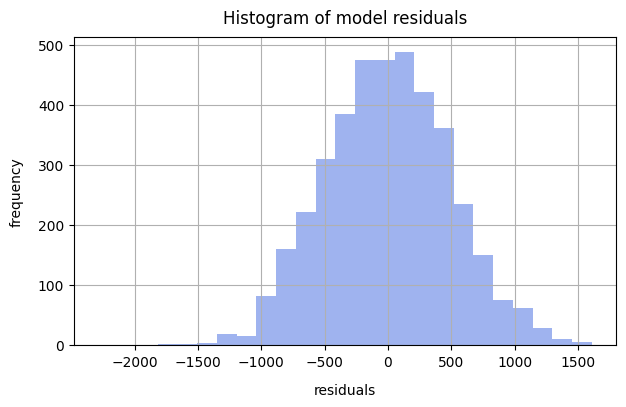

In [9]:
# Laden eines gespeicherten Multiplen Linearen Regressionsmodells (damit alle das gleiche Modell haben)
with open('./Data/ols_model.pkl', 'rb') as f:
    ols_model = pickle.load(f)

# Anzeigen der ersten 5 Modellresiduen
print(ols_model.resid.head())

# Erstellen eines Histogramms der Modellresiduen
fig = plt.figure(figsize = (7,4))
n, bins, patches = plt.hist(x=ols_model.resid,
                            bins = 25,
                            color = 'royalblue',
                            alpha = 0.5)

# Anpassen der Plot-Achsen, -Titel und Hinzufügen eines Grids
plt.xlabel('residuals', fontsize = 10, labelpad = 10)
plt.ylabel('frequency', fontsize = 10, labelpad = 10)
plt.title('Histogram of model residuals', fontsize = 12, pad = 10)
plt.grid()

# Anzeigen des Histogramms
plt.show()

#### <b>Aufgabe (4): Erstellen Sie eine Preisvorhersage für ein Bicycle auf der Basis der geschätzten Modellkoeffizienten.</b>
<b>Details zur Aufgabenstellung:</b>
- Verwenden Sie den Python Code unten, um ein abgespeichertes Multiples Lineares Regressionsmodell zu laden.
- Im Python Code werden die geschätzen Koeffizienten der erklärenden Variablen sowie der Achsenabschnitt (engl.: intercept oder const) angezeigt.
- Verwenden Sie die geschätzen Koeffizienten inkl. const, und erstellen Sie per Hand eine Preisschätzung für ein Bicycle mit den unten angegebenen Eigenschaften.
- Fügen Sie Ihre Formel für die Schätzung in die vorbereitete print() Funktion ein (Ersetzen Sie die '...').

<b style="color: gray;">(max. erreichbare Punkte: 4)</b>

In [12]:
# Laden eines gespeicherten Multiplen Linearen Regressionsmodells (damit alle das gleiche Modell haben)
with open('./Data/ols_model.pkl', 'rb') as f:
    ols_model = pickle.load(f)

# Anzeigen der geschätzen Koeffizienten (gerundet auf 2 Dezimalstellen)
print("Geschätze Koeffizienten des OLS Modells:")
print(ols_model.params.round(2), '\n')

# Schätzen Sie den Preis eines Bikes mit folgenden Eigenschaften:
# gear_count = 12
# frame_size = 54
# wheel_size = 28
# is_ebike = 1

try:
    # Geben Sie hier Ihre Lösung ein (ersetzen Sie jeweils die drei Punkte durch die korrekten Werte)
    code = "print(f'Geschätzer Preis des Bikes: {-3077.69 + (12*78.95) + (54*18.90) + (28*96.17) + (1*1605.17):.2f} CHF')" # Hinweis: ():.2f gibt die Lösung auf 2 Dezimalstellen genau aus
    eval(code)  # führt den Code aus
except:
    print("Ihre manuell erstellte Formel ist unvollständig/fehlerhaft. Bitte überprüfen Sie Ihre Eingabe!")

Geschätze Koeffizienten des OLS Modells:
const        -3077.69
gear_count      78.95
frame_size      18.90
wheel_size      96.17
is_ebike      1605.17
dtype: float64 

Geschätzer Preis des Bikes: 3188.24 CHF


#### <b>Aufgabe (5): Erstellen Sie ein Regression Tree Model für die Vorhersage der Bicycle Preise.</b>
<b>Details zur Aufgabenstellung:</b>
- Verwenden Sie den Python Code in der folgenden Codezelle, um die Trainings- und Testdaten einzulesen.
- Erstellen und Trainieren Sie ein Regression Tree Model mit einer maximalen Tiefe von 3 (max_depth=3).
- Erstellen Sie eine Vorhersage der Preise für die Testdaten (X_test).
- Berechnen Sie die Vorhersagegüte mit Hilfe des r-squared (coefficient of determination).
- Stellen Sie das Regression Tree Model im Jupyter Notebook graphisch dar. 

<b style="color: gray;">(max. erreichbare Punkte: 8)</b>

R-Squared 0.7231


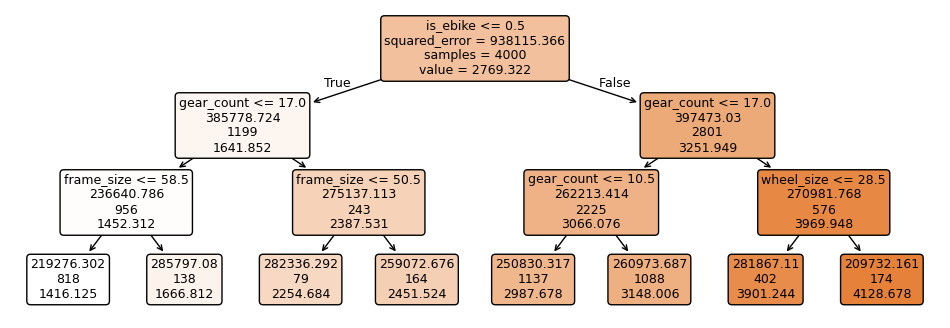

In [13]:
# Einlesen der Trainings- und Testdaten (damit alle die gleichen Daten haben)
X_train = pd.read_csv('./Data/X_train.csv')
X_test = pd.read_csv('./Data/X_test.csv')
y_train = pd.read_csv('./Data/y_train.csv')
y_test = pd.read_csv('./Data/y_test.csv')

# Erstellen eines 'decision tree regressor' Objekts
reg_tree = DecisionTreeRegressor(random_state = 42, max_depth = 3)

# Trainieren des 'decision tree regressor' Objekts
reg_tree.fit(X_train, y_train)

# Vorhersage der Preise für die Testdaten
y_pred = reg_tree.predict(X_test)

# Berechnen des r-squared (coefficient of determination) Wertes
print('R-Squared', round(r2_score(y_test, y_pred), 4))

# Darstellen des Regression Trees
fig = plt.figure(figsize = (12,4))
reg_tree_plot = tree.plot_tree(reg_tree,
                               feature_names = list(X_train.columns),
                               class_names = ['price'],
                               filled = True,
                               fontsize = 9,
                               label = 'root',
                               rounded = True)



#### <b>Aufgabe (6): Erstellen Sie ein Random Forest Regression Model für die Vorhersage der Bicycle Preise.</b>
<b>Details zur Aufgabenstellung:</b>
- Verwenden Sie den Python Code in der folgenden Codezelle, um die Trainings- und Testdaten einzulesen.
- Erstellen und Trainieren Sie ein Random Forest Regression Model mit 500 einzelnen Trees und einer maximalen Tiefe von 5.
- Erstellen Sie eine Vorhersage der Preise für die Testdaten (X_test).
- Berechnen Sie die Vorhersagegüte mit Hilfe des r-squared (coefficient of determination).
- Stellen Sie die Feature Importance mit Hilfe eines Barcharts graphisch dar.

<b style="color: gray;">(max. erreichbare Punkte: 8)</b>

R-Squared: 0.7291


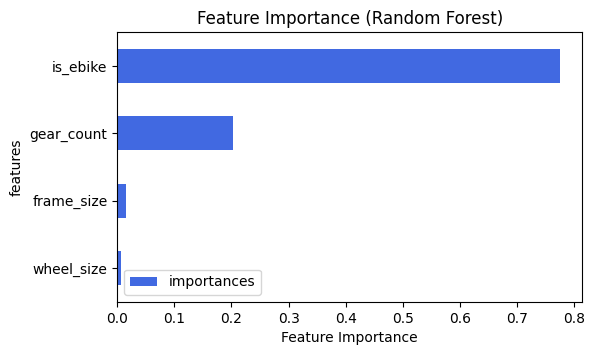

In [14]:
# Einlesen der Trainings- und Testdaten (damit alle die gleichen Daten haben)
X_train = pd.read_csv('./Data/X_train.csv')
X_test = pd.read_csv('./Data/X_test.csv')
y_train = pd.read_csv('./Data/y_train.csv')
y_test = pd.read_csv('./Data/y_test.csv')

# Erstellen/Initialisieren eines 'random forest regressor' Objekts
reg_rf = RandomForestRegressor(random_state = 42, n_estimators = 500, max_depth = 5)

# Trainieren des 'random forest regressor' Objekts
reg_rf.fit(X_train, y_train)

# Vorhersage der Preise für die Testdaten X_test
y_pred = reg_rf.predict(X_test)


# Berechnen des r-squared (coefficient of determination)
print('R-Squared:', round(r2_score(y_test, y_pred), 4))

# Graphische Darstellung der Feature Importance
cols = X_train.columns
importances = reg_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in reg_rf.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

df_fi = pd.DataFrame({'features':cols, 'importances': importances})
df_fi.sort_values('importances', inplace = True)
df_fi.plot(kind = 'barh',
           y = 'importances',
           x = 'features',
           color = 'royalblue',
           xlabel = 'Feature Importance',
           title = 'Feature Importance (Random Forest)',
           figsize = (6,3.5))

plt.show()

#### <b>Aufgabe (7): Erstellen Sie ein Random Forest Classification Model für die Vorhersage von E-Bikes und anderen Bikes.</b>
<b>Details zur Aufgabenstellung:</b>
- Es handelt sich bei diesem Beispiel um ein Klassifikationsproblem mit zwei Klassen ('E-Bike' und 'kein E-Bike').
- Ergänzen Sie den Python Code in der folgenden Code-Zelle dort wo notwendig.
- Beantworten Sie mit eigenen Worten die Frage: Wie gut ist das Modell darin, E-Bikes von anderen Bikes zu unterscheiden?
- Verwenden Sie für die Beantwortung der Frage die vorgefertigte print() Funktion (Ersetzen Sie die '...' per Hand oder mit Hilfe von Python Code).

<b style="color: gray;">(max. erreichbare Punkte: 8)</b>

In [ ]:
# Einlesen der Trainings- und Testdaten (damit alle die gleichen Daten haben)
X_train_class = pd.read_csv('./Data/X_train_class.csv')
X_test_class = pd.read_csv('./Data/X_test_class.csv')
y_train_class = pd.read_csv('./Data/y_train_class.csv')
y_test_class = pd.read_csv('./Data/y_test_class.csv')

# Umformen der y_train and y_test zu 1-dimensional arrays
y_train_class = y_train_class.values.ravel()
y_test_class = y_test_class.values.ravel()

# Erstellen/Initialisieren des 'random forest classifier' Objekts


# Trainieren des Random Forest Classification Modells


# Vorhersage der Zielvariable für die Testdaten


# Confusion matrix


# Classification report


# Erstellen der Graphik mit ROC curve und AUC


# Beantworten Sie die Frage: Wie gut ist das Modell darin, die beiden Klassen zu unterscheiden?
print(f'\nDas Modell ist ... darin, E-Bikes von anderen Bikes zu unterscheiden, da die AUC bei ... liegt.')


### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('IP Address:', socket.gethostbyname(socket.gethostname()))
print('-----------------------------------')